In [48]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [49]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
t_train.shape

(60000,)

In [52]:
x_test.shape

(10000, 28, 28)

In [53]:
t_test.shape

(10000,)

In [54]:
t_train[0]


5

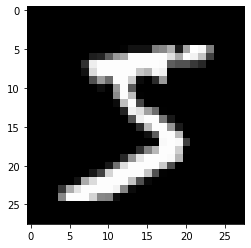

In [55]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

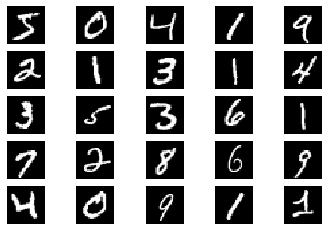

In [56]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# data 전처리

In [57]:
# 학습데이터 / 테스트 데이터 전처리
x_train = (x_train - 0.0)/255
x_test = (x_test - 0.0) / 255

0.0 1.0


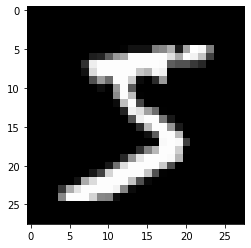

In [58]:
print(np.min(x_train), np.max(x_train))
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [59]:
print(x_train.dtype, x_test.dtype)

float64 float64


In [60]:
print(t_train.shape, t_test.shape)

(60000,) (10000,)


In [61]:
# One-hot encoding
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [62]:
print(t_train.shape, t_test.shape)

(60000, 10) (10000, 10)


In [63]:
#one-hot encoding 되었음을 알 수 있다.
print(t_train[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# model 구축, compile

In [64]:
model = tf.keras.Sequential()


# Layer add

In [65]:
#28 * 28 크기의 2차원 이미지를 784개의 1차원 벡터로 변환
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [66]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy',metrics=['accuracy'])


In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [68]:
# validation_split값은, training data에서 "얼마만큼의 비율"로 validation data생성 후, 
# 오버피팅 확인할지를 정하는 것
hist = model.fit(x_train, t_train, epochs=30, validation_split = 0.3)
# model.fit함수의 return 값은 hist.history['loss'] 그리고, hist.history['accuracy']와
#같이 저장된다.

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5257 - accuracy: 0.8537 - val_loss: 0.1883 - val_accuracy: 0.9461
Epoch 2/30
1313/1313 [==============================] - 1s 911us/step - loss: 0.1550 - accuracy: 0.9539 - val_loss: 0.1356 - val_accuracy: 0.9608
Epoch 3/30
1313/1313 [==============================] - 1s 919us/step - loss: 0.0991 - accuracy: 0.9711 - val_loss: 0.1292 - val_accuracy: 0.9611
Epoch 4/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0727 - accuracy: 0.9782 - val_loss: 0.1124 - val_accuracy: 0.9684
Epoch 5/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.0545 - accuracy: 0.9842 - val_loss: 0.1170 - val_accuracy: 0.9678
Epoch 6/30
1313/1313 [==============================] - 1s 973us/step - loss: 0.0440 - accuracy: 0.9873 - val_loss: 0.1074 - val_accuracy: 0.9698
Epoch 7/30
1313/1313 [==============================] - 1s 940us/step - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.0990 - val_a

In [69]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 586us/step - loss: 0.1294 - accuracy: 0.9768


[0.129365473985672, 0.9768000245094299]

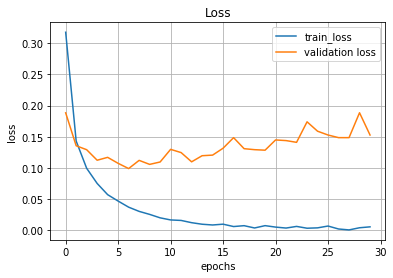

In [71]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

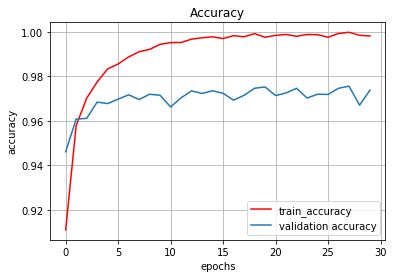

In [73]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train_accuracy',color = 'red')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')
plt.show()

# 혼동행렬( confusion matrix)